In [181]:
# Imports
import numpy as np
import pylab as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import pearsonr
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Some useful functions

def normalplot(x, y, region, colour, mark):
    ''' Scatter plot sorted by region. '''
    plt.scatter(x, y, c=colour, marker=mark, label=region)
    
def normalplot3d(x, y, z, region, colour, mark):
    ''' 3d scatter plot sorted by region. '''
    ax.scatter(x, y, z, color=colour, marker=mark, label=region)

def dataplot(df, region, colour, mark):
    ''' Apply PCA and then scatter plot sorted by region. '''
    df_reduced = PCA(n_components=2).fit_transform(df)
    x = df_reduced[:,0]
    y = df_reduced[:,1]
    plt.scatter(x, y, c=colour, marker=mark, label=region)
    
def dataplot3d(df, region, colour, mark):
    ''' Apply PCA and then 3d scatter plot sorted by region. '''
    df_reduced = PCA(n_components=3).fit_transform(df)
    x = df_reduced[:,0]
    y = df_reduced[:,1]
    z = df_reduced[:,2]
    ax.scatter(x, y, z, color=colour, marker=mark, label=region)
    
def get_pearsonr(data, col):
    ''' Calculates all possible correlation coefficients for a given 
    column name. '''
    print('Correlation with {}'.format(col))
    for arr in ['Blood pressure', 'Blood glucose', 'Cholesterol', 'BMI', 'Hale']:
        if arr != col:
            pcorr = pearsonr(data[arr], data[col])
            print(arr + ':', 'PearsonR: {:.2f}'.format(pcorr[0]), 'P-Value: {:.2e}'.format(pcorr[1]))
    print '-'*55
    print '\n'
    
def reformat(data):
    ''' Function to reformat the data; splits the arrays based on region
    and removes the region/country names and codes. '''
    df = data.copy()
    df1 = df[df['Region code'] == 'EUR']
    df2 = df[df['Region code'] == 'AFR']
    df3 = df[df['Region code'] == 'AMR']
    df4 = df[df['Region code'] == 'WPR']
    df5 = df[df ['Region code'] == 'SEAR']
    df6 = df[df['Region code'] == 'EMR']
    dfl = [df1, df2, df3, df4, df5]
    
    for dframe in dfl:
        dframe.drop(dframe.loc[:, ('Country','ISO3 Code', 'Region', 'Region code')], axis=1, inplace=True)
    df = df.drop(df.loc[:, ('Country', 'ISO3 Code', 'Region', 'Region code')], axis=1)
    
    return (df, dfl)

def remove_labels(data):
    df = data.copy()
    df = df.drop(df.loc[:, ('Country', 'ISO3 Code', 'Region', 'Region code')], axis=1, errors='ignore')
    return df

'''
for label, x, y in zip(labels, X, Y):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
'''
def clustering_plot3d(data, n=6, x_label='Animal Products', y_label='Vegetal Products', z_label='Grand Total'):
    ''' Plot for K-Means clustering with n clusters. '''
    X = remove_labels(data)
    estimators = {'K-Means with six clusters': KMeans(n_clusters=n)}
    
    for name, est in estimators.items():
        fig = plt.figure(1, figsize=(8, 6))
        ax = Axes3D(fig, rect=None, elev=35, azim=140) # rect=[0, 0, 0.95, 1]
        est.fit(X)
        labels = est.labels_
        ax.scatter(X.loc[:, 'Animal Products'], X.loc[:, 'Vegetal Products'], X.loc[:, 'Grand Total'],
                  c=labels.astype(np.float))
        #ax.set_title(name)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_zlabel(z_label)
        plt.show()
        
def clustering_plot3dPCA(data, n=6, x_label='First principal value', y_label='Second principal value', 
                         z_label='Third principal value'):
    ''' Plot for K-Means clustering with n clusters. '''
    X = remove_labels(data)
    X_reduced = pd.DataFrame(PCA(n_components=3).fit_transform(X))
    X_reduced.columns = ['First', 'Second', 'Third']
    estimators = {'K-Means with six clusters': KMeans(n_clusters=n)}
    
    for name, est in estimators.items():
        fig = plt.figure(1, figsize=(8, 6))
        ax = Axes3D(fig, rect=None, elev=35, azim=140) # rect=[0, 0, 0.95, 1]
        est.fit(X_reduced)
        labels = est.labels_
        ax.scatter(X_reduced.loc[:, 'First'], X_reduced.loc[:, 'Second'], X_reduced.loc[:, 'Third'],
                  c=labels.astype(np.float))
        #ax.set_title(name)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_zlabel(z_label)
        plt.show()
        
def clustering_plot(data, n=6):
    ''' Plot for K-Means clustering with n clusters. '''
    X = remove_labels(data)
    X.drop('Grand Total', axis=1, inplace=True)
    estimators = {'K-Means with six clusters': KMeans(n_clusters=n)}
    
    for name, est in estimators.items():
        fig = plt.figure(1, figsize=(8, 6))
        est.fit(X)
        labels = est.labels_
        plt.scatter(X.loc[:, 'Animal Products'], X.loc[:, 'Vegetal Products'], c=labels.astype(np.float))
        #ax.set_title(name)
        plt.xlabel('Animal Products')
        plt.ylabel('Vegetal Products')
        plt.show()
        
def clustering_plotPCA(data, n=6):
    ''' Plot for K-Means clustering with n clusters. '''
    X = remove_labels(data)
    X_reduced = pd.DataFrame(PCA(n_components=2).fit_transform(X))
    X_reduced.columns = ['First', 'Second']
    estimators = {'K-Means with six clusters': KMeans(n_clusters=n)}
    
    for name, est in estimators.items():
        fig = plt.figure(1, figsize=(8, 6))
        est.fit(X_reduced)
        labels = est.labels_
        plt.scatter(X_reduced.loc[:, 'First'], X_reduced.loc[:, 'Second'], c=labels.astype(np.float))
        #ax.set_title(name)
        ax.set_xlabel('First principal value')
        ax.set_ylabel('Second principal value')
        plt.show()

def clustering_data(data, n=6):
    ''' K-Means clustering with n clusters. '''
    X = remove_labels(data)
    estimators = {'K-Means with six clusters': KMeans(n_clusters=n)}
    
    for name, est in estimators.items():
        est.fit(X)
        labels = est.labels_
        
    data_clustered = data.copy()
    data_clustered['Cluster'] = labels
    return data_clustered

def clustering_dataPCA(data, n=6, n_pca=3):
    ''' K-Means clustering with n clusters. '''
    data_clustered = data.copy()
    tmp = reformat(data)
    df = tmp[0]
    df_reduced = PCA(n_components=n_pca).fit_transform(df)
    
    estimators = {'K-Means with six clusters': KMeans(n_clusters=n)}
    
    for name, est in estimators.items():
        est.fit(df_reduced)
        labels = est.labels_
        
    data_clustered['Cluster'] = labels
    return data_clustered

def color_map(countries, values, verbose=False, 
              cclist=['tomato', 'seagreen', 'thistle', 'sandybrown', 'powderblue', 'gold']):
    '''Colours countries on a world map based on their assigned cluster. '''
    
    countries_shp = shpreader.natural_earth(resolution='110m',category='cultural',
                                            name='admin_0_countries')
    # Create a plot
    fig = plt.figure(figsize=(15, 12))
    ax = plt.axes(projection=ccrs.PlateCarree())
    dd = dict(zip(range(6), cclist))
    dd2 = dict(zip(countries, values))
    
    # Add countries to the map
    for country in shpreader.Reader(countries_shp).records():
        countrycode = country.attributes['adm0_a3']
        countryname = country.attributes['name_long']
        ## Check for country code consistency
        if countrycode == 'SDS': #South Sudan
           countrycode = 'SSD'
        elif countrycode == 'ROU': #Romania
           countrycode = 'ROM'
        elif countrycode == 'COD': #Dem. Rep. Congo
           countrycode = 'ZAR'
        elif countrycode == 'KOS': #Kosovo
           countrycode = 'KSV'
        if countrycode in countries:
            val = dd2[countrycode]
            if np.isfinite(val):
                color = dd[val]
            else: 
                color = 'grey'
        else:
            color = 'linen'
            if verbose:
                print("No data available for "+countrycode+": "+countryname)
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, label=countrycode)
    plt.show()
    
def map_plotly(data):
    tmp = clustering_data(data, n=6)
    countries = list(tmp['ISO3 Code'])
    values = np.array(tmp['Cluster'])
    color_map(countries, values)
    
def map_plotlyPCA(data, n=6, n_pca=3):
    tmp = clustering_dataPCA(data, n, n_pca)
    countries = list(tmp['ISO3 Code'])
    values = np.array(tmp['Cluster'])
    color_map(countries, values)

def plot_all(data, n=6, n_pca=3):
    data_clustered = data.copy()
    X = remove_labels(data)
    X_reduced = pd.DataFrame(PCA(n_components=3).fit_transform(X))
    X_reduced.columns = ['First', 'Second', 'Third']
    estimators = {'K-Means with six clusters': KMeans(n_clusters=n)}
    cclist=['tomato', 'seagreen', 'thistle', 'sandybrown', 'powderblue', 'gold']
    dd = dict(zip(range(6), cclist))
    
    for name, est in estimators.items():
        fig = plt.figure(1, figsize=(8, 6))
        ax = Axes3D(fig, rect=None, elev=35, azim=140) # rect=[0, 0, 0.95, 1]
        est.fit(X_reduced)
        labels = est.labels_
        colours_list = labels.astype(np.float)
        ll = []
        for item in colours_list:
            ll.append(dd[item])
        ax.scatter(X_reduced.loc[:, 'First'], X_reduced.loc[:, 'Second'], X_reduced.loc[:, 'Third'], c=ll)
        ax.set_xlabel('First principal value')
        ax.set_ylabel('Second principal value')
        ax.set_zlabel('Third principal value')
    
    data_clustered['Cluster'] = labels
    countries = list(data_clustered['ISO3 Code'])
    values = np.array(data_clustered['Cluster'])
    color_map(countries, values)
    plt.show()

In [2]:
# Load and modify the data to prepare it for analysis
data_coarse = pd.read_csv('data_coarse.csv') # Food supply in kcal/day
data_fine = pd.read_csv('data_fine.csv') # Food supply in kcal/day with more sub-categories
data_blood_pressure = pd.read_csv('data_blood.csv') # Raised blood pressure (SBP ≥ 140 OR DBP ≥ 90), age-standardized (%)
data_bmi = pd.read_csv('data_bmi.csv') # Overweight (body mass index ≥ 25), age-standardized (%)
data_hale = pd.read_csv('data_hale.csv') # Healthy life expectancy (HALE)
data_glucose = pd.read_csv('data_glucose.csv') # Raised fasting blood glucose (≥ 7.0 mmol/L or on medication)
data_cholesterol = pd.read_csv('data_cholesterol.csv') # Raised total cholesterol (≥5.0 mmol/L)
data_income = pd.read_csv('data_income.csv') # GNI per capita to estimate the income 
data_coded = pd.read_csv('data-verbose.csv')
data_coded = data_coded[['REGION (CODE)', 'REGION (DISPLAY)', 'COUNTRY (CODE)', 'COUNTRY (DISPLAY)']]
data_coded.columns = ['Region code', 'Region', 'ISO3 Code', 'Country']
data_coded.drop_duplicates(inplace=True)
data_labels = pd.read_csv('data_labels.csv') # Country and region labels
tmp = data_labels.copy()
tmp.drop(['Country Group Code', 'M49 Code', 'ISO2 Code', 'Country Code' , 'Country Group'], 
                 axis=1, inplace=True, errors='ignore')
tmp.drop_duplicates(inplace=True)
labels_temp = tmp.copy()
data_labels.drop(['Country Group Code', 'M49 Code', 'ISO2 Code', 'Country Code' , 'Country Group', 'Country'], 
                 axis=1, inplace=True, errors='ignore')
data_labels.drop_duplicates(inplace=True)
data_region = pd.merge(data_coded, data_labels, how='left', on='ISO3 Code')
data_region.drop_duplicates(inplace=True)

coarse = data_coarse[['Country', 'Item', 'Year', 'Value']]
fine = data_fine[['Country', 'Item', 'Year', 'Value']]
bp = data_blood_pressure[['Country', 'Year', 'Sex', 'Numeric']]
bmi = data_bmi[['Country', 'Year', 'Sex', 'Numeric']]
gluc = data_glucose[['Country', 'Year', 'Sex', 'Numeric']]
chol = data_cholesterol[['Country', 'Year', 'Both sexes']]
ch_tmp = chol['Both sexes'].str.split(' ', 1, expand=True)
ch_tmp['Country'] = chol['Country']
chol = pd.merge(chol, ch_tmp, how='inner', on='Country')
chol = chol[['Country', 'Year', 0]]
chol[0] = pd.to_numeric(chol[0], errors='coerce')
hale = data_hale.copy()
#data_fine[data_fine['Country'] == 'China']

In [3]:
# Take the average over the years andbetween sexes, then rename the columns
nuc = coarse.groupby(['Country', 'Item'])[['Value']].mean().reset_index()
nuf = fine.groupby(['Country', 'Item'])[['Value']].mean().reset_index()
bp = bp.groupby(['Country'])[['Numeric']].mean().reset_index()
bmi = bmi.groupby(['Country'])[['Numeric']].mean().reset_index()
gluc = gluc.groupby(['Country'])[['Numeric']].mean().reset_index()
chol = chol.groupby(['Country'])[[0]].mean().reset_index()

bp.columns = ['Country', 'Blood pressure']
bmi.columns = ['Country', 'BMI']
gluc.columns = ['Country', 'Blood glucose']
chol.columns = ['Country', 'Cholesterol']

In [50]:
# Pivot the nutrition dataframes
tmp1 = nuc.pivot(index='Country', columns='Item', values='Value').reset_index()
tmp2 = nuf.pivot(index='Country', columns='Item', values='Value').reset_index()
tmp1.fillna(value=0, inplace=True) # Fill missing nutrition data with zero, otherwise too
tmp2.fillna(value=0, inplace=True) # many countries are excluded for analysis

# Get the ISO3 Codes into the nutrition dataframes
tmp3 = pd.merge(labels_temp, tmp1, how='right', on='Country')
tmp3.drop('Country', axis=1, inplace=True)
tmp4 = pd.merge(labels_temp, tmp2, how='right', on='Country')
tmp4.drop('Country', axis=1, inplace=True)

# Merge the data frames and drop rows that contain NaN entries
tmp5 = pd.merge(data_region, tmp3, how='right', on='ISO3 Code')
tmp6 = pd.merge(data_region, tmp4, how='right', on='ISO3 Code')
nutrition_coarse = tmp5.dropna()
nutrition_fine = tmp6.dropna()

dfcs = [tmp5, bp, bmi, gluc, chol, hale]
dffs = [tmp6, bp, bmi, gluc, chol, hale]
dfc = reduce(lambda left, right: pd.merge(left, right, how='inner', on='Country'), dfcs)
dff = reduce(lambda left, right: pd.merge(left, right, how='inner', on='Country'), dffs)
dfc = dfc.dropna()
dff = dff.dropna()
region_code = dfc['Region code'].unique()
dff.head()

,Region code,Region,ISO3 Code,Country,Animal fats,Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Starchy Roots,Sugar & Sweeteners,Treenuts,Vegetable Oils,Vegetables,Blood pressure,BMI,Blood glucose,Cholesterol,Hale
0,EUR,Europe,ALB,Albania,69.339623,1463.188679,16.169811,5.735849,91.415094,138.301887,...,41.452830,167.981132,13.547170,159.264151,71.490566,31.269512,41.42750,7.69,45.3,68.8
1,AFR,Africa,DZA,Algeria,29.566038,1421.792453,10.245283,6.792453,95.207547,64.698113,...,64.132075,237.792453,6.188679,274.660377,48.471698,29.810976,43.57625,10.64,39.4,66.3
2,AMR,Americas,BOL,Bolivia (Plurinational State of),87.226415,838.660377,14.132075,3.377358,126.377358,197.188679,...,215.188679,271.622642,20.660377,64.528302,45.150943,22.279268,40.73750,6.84,36.2,62.5
3,AFR,Africa,TCD,Chad,9.924528,1057.471698,1.471698,11.075472,31.452830,57.981132,...,198.264151,68.132075,0.000000,82.698113,7.641509,30.864634,14.19625,5.32,17.9,46.1
4,AMR,Americas,CHL,Chile,54.094340,1195.679245,21.528302,24.867925,60.490566,263.132075,...,120.830189,383.849057,3.301887,191.792453,79.094340,28.913415,51.90500,10.53,48.6,70.5


In [59]:
# Let's see if normalising the data by total calories consumed has an impact on the results.
df = dfc.copy()
df.loc[:, 'Animal Products'] = pd.Series(df['Animal Products']/df['Grand Total'], index=df.index)
df.loc[:, 'Vegetal Products'] = pd.Series(df['Vegetal Products']/df['Grand Total'], index=df.index)
dfcn = df.copy()

df = dff.copy()
df.loc[:, 'Grand Total'] = dfc['Grand Total']
for arr in df:
    if arr not in ['Region code', 'Region', 'ISO3 Code', 'Country', 'Blood pressure', 'BMI', 'Blood glucose', 
                  'Cholesterol', 'Hale', 'Grand Total']: # Don't normalise these columns
        df.loc[:, arr] = pd.Series(df[arr]/df['Grand Total'], index=df.index)
df.drop('Grand Total', axis=1, inplace=True)    
dffn = df.copy()
dffn.head()

,Region code,Region,ISO3 Code,Country,Animal fats,Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Starchy Roots,Sugar & Sweeteners,Treenuts,Vegetable Oils,Vegetables,Blood pressure,BMI,Blood glucose,Cholesterol,Hale
0,EUR,Europe,ALB,Albania,0.026163,0.552088,0.006101,0.002164,0.034493,0.052184,...,0.015641,0.063382,0.005112,0.060093,0.026975,31.269512,41.42750,7.69,45.3,68.8
1,AFR,Africa,DZA,Algeria,0.011926,0.573482,0.004132,0.002740,0.038402,0.026096,...,0.025868,0.095914,0.002496,0.110785,0.019551,29.810976,43.57625,10.64,39.4,66.3
2,AMR,Americas,BOL,Bolivia (Plurinational State of),0.043043,0.413852,0.006974,0.001667,0.062363,0.097306,...,0.106189,0.134037,0.010195,0.031843,0.022281,22.279268,40.73750,6.84,36.2,62.5
3,AFR,Africa,TCD,Chad,0.005167,0.550561,0.000766,0.005766,0.016376,0.030187,...,0.103224,0.035472,0.000000,0.043056,0.003978,30.864634,14.19625,5.32,17.9,46.1
4,AMR,Americas,CHL,Chile,0.020011,0.442325,0.007964,0.009200,0.022378,0.097342,...,0.044699,0.142000,0.001221,0.070951,0.029260,28.913415,51.90500,10.53,48.6,70.5


In [53]:
# Dataframes for just the normalised nutrition data without the health indicators
ncn = dfcn.loc[:, ('Region code', 'Region', 'ISO3 Code', 'Country', 'Animal Products', 'Grand Total', 'Vegetal Products')]
nfn = dffn.copy()
nfn.drop(['Blood pressure', 'BMI', 'Blood glucose', 'Cholesterol', 'Hale', 'Grand Total'], axis=1, inplace=True)
nfn.head()

,Region code,Region,ISO3 Code,Country,Animal fats,Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Offals,Oilcrops,Pulses,Starchy Roots,Sugar & Sweeteners,Treenuts,Vegetable Oils,Vegetables
0,EUR,Europe,ALB,Albania,0.026163,0.552088,0.006101,0.002164,0.034493,0.052184,0.117624,0.003382,0.006635,0.015349,0.015641,0.063382,0.005112,0.060093,0.026975
1,AFR,Africa,DZA,Algeria,0.011926,0.573482,0.004132,0.002740,0.038402,0.026096,0.060373,0.001385,0.001583,0.018737,0.025868,0.095914,0.002496,0.110785,0.019551
2,AMR,Americas,BOL,Bolivia (Plurinational State of),0.043043,0.413852,0.006974,0.001667,0.062363,0.097306,0.022970,0.006033,0.008221,0.012337,0.106189,0.134037,0.010195,0.031843,0.022281
3,AFR,Africa,TCD,Chad,0.005167,0.550561,0.000766,0.005766,0.016376,0.030187,0.028380,0.003517,0.128775,0.042231,0.103224,0.035472,0.000000,0.043056,0.003978
4,AMR,Americas,CHL,Chile,0.020011,0.442325,0.007964,0.009200,0.022378,0.097342,0.052664,0.002890,0.002045,0.016535,0.044699,0.142000,0.001221,0.070951,0.029260


In [5]:
# Define the colours, markers and a dictionary for the regions
clist = ['tomato', 'darkgreen', 'orchid', 'darkorange', 'mediumblue', 'gold'] # Colours for the scatter plot
mlist = ['*', 'v', 's', 'o', 'h', 'x'] # Markers for the scatter plot
d = dict(zip(region_code ,zip(clist,mlist))) # Dictionary for region codes, colours and markers

C:\Users\Simon\Anaconda2\envs\geoplotting\lib\site-packages\ipykernel\__main__.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


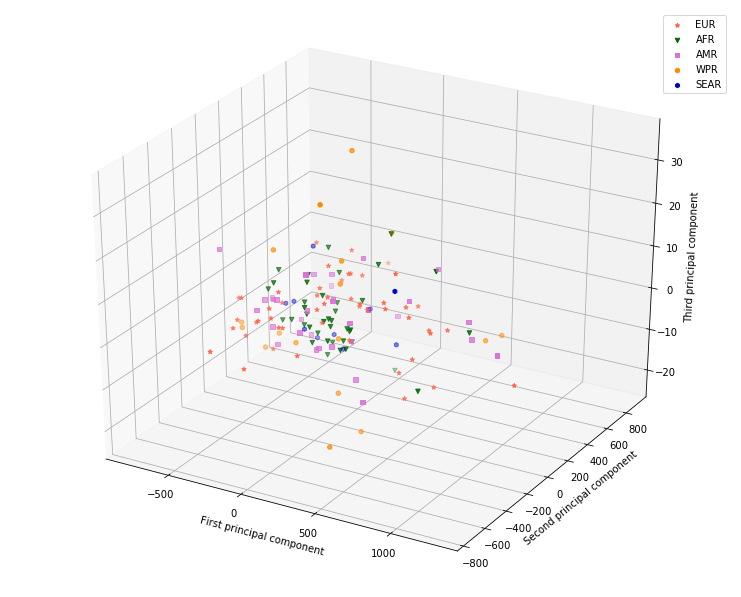

In [119]:
# PCA with three components
tmp = reformat(dfc)
df = tmp[0] ; dfl = tmp[1]
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
for ind, df in enumerate(dfl):
    dataplot3d(df, region_code[ind], clist[ind], mlist[ind])
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_zlabel('Third principal component')
#ax.set_title('All data')
plt.legend()
plt.show()

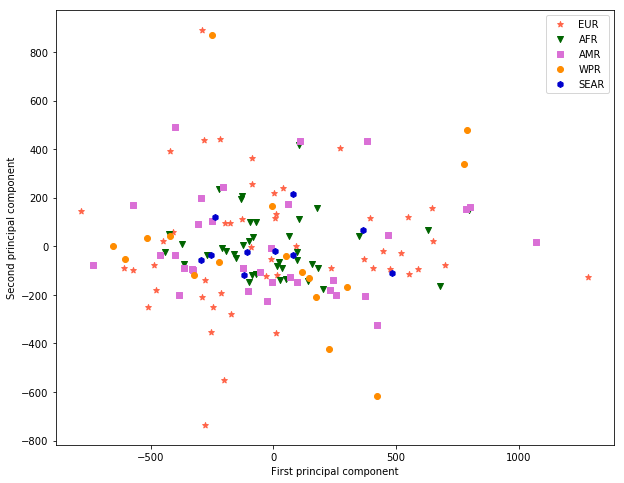

In [120]:
# PCA with two components
plt.figure(figsize=(10, 8))
for ind, df in enumerate(dfl):
    dataplot(df, region_code[ind], clist[ind], mlist[ind])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
#plt.title('All data')
plt.legend()
plt.show()

C:\Users\Simon\Anaconda2\envs\geoplotting\lib\site-packages\ipykernel\__main__.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


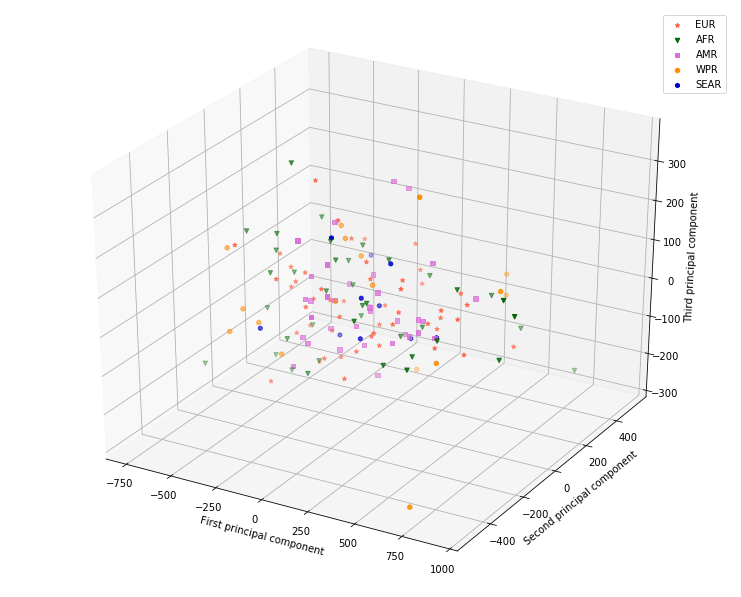

In [103]:
# PCA with three components
tmp = reformat(nutrition_fine)
df = tmp[0] ; dfl = tmp[1]
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
for ind, df in enumerate(dfl):
    dataplot3d(df, region_code[ind], clist[ind], mlist[ind])
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_zlabel('Third principal component')
#ax.set_title('Nutrition')
plt.legend()
plt.show()

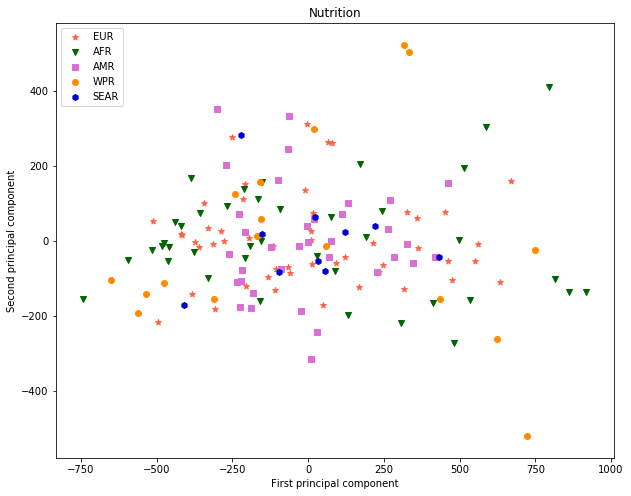

In [9]:
# PCA with two components
plt.figure(figsize=(10, 8))
for ind, df in enumerate(dfl):
    dataplot(df, region_code[ind], clist[ind], mlist[ind])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Nutrition')
plt.legend()
plt.show()

C:\Users\Simon\Anaconda2\envs\geoplotting\lib\site-packages\ipykernel\__main__.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


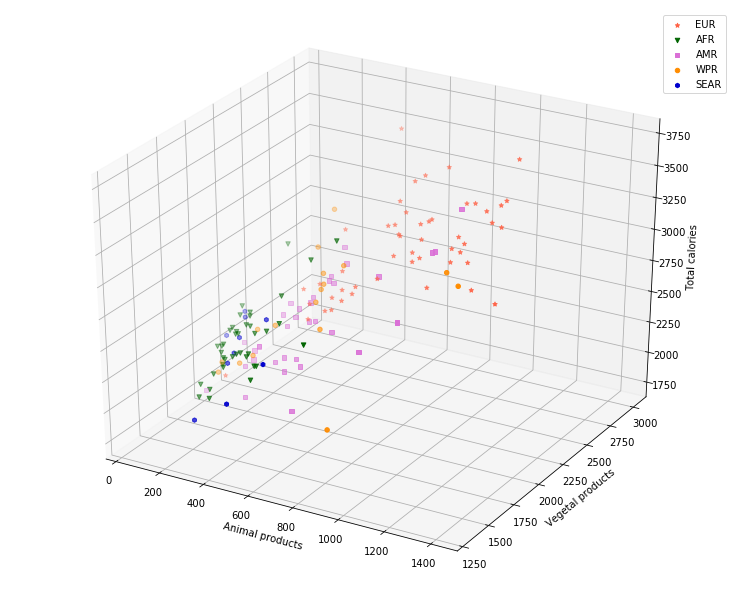

In [121]:
# PCA with three components
tmp = reformat(nutrition_coarse)
df = tmp[0] ; dfl = tmp[1]
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
for ind, df in enumerate(dfl):
    x = df['Animal Products']
    y = df['Vegetal Products']
    z = df['Grand Total']
    #dataplot3d(df, region_code[ind], clist[ind], mlist[ind])
    normalplot3d(x, y, z, region_code[ind], clist[ind], mlist[ind])
ax.set_xlabel('Animal products')
ax.set_ylabel('Vegetal products')
ax.set_zlabel('Total calories')
#ax.set_title('Nutrition coarse')
plt.legend()
plt.show()

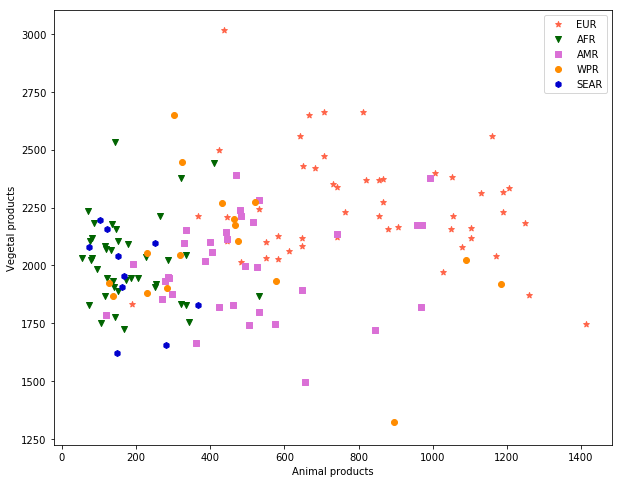

In [122]:
# PCA with two components
plt.figure(figsize=(10, 8))
for ind, df in enumerate(dfl):
    x = df['Animal Products']
    y = df['Vegetal Products']
    normalplot(x, y, region_code[ind], clist[ind], mlist[ind])
    #dataplot(df, region_code[ind], clist[ind], mlist[ind])
plt.xlabel('Animal products')
plt.ylabel('Vegetal products')
#plt.title('Nutrition')
plt.legend()
plt.show()

C:\Users\Simon\Anaconda2\envs\geoplotting\lib\site-packages\ipykernel\__main__.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


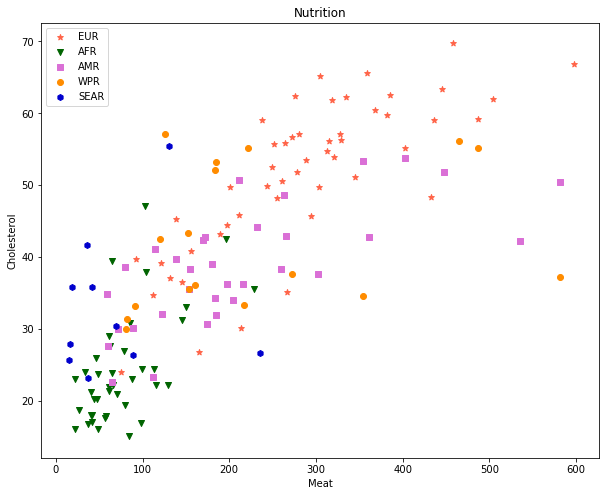

In [12]:
# PCA with two components
tmp = reformat(dff)
df = tmp[0] ; dfl = tmp[1]
plt.figure(figsize=(10, 8))
for ind, df in enumerate(dfl):
    x = pd.DataFrame(df.loc[:, 'Meat'])
    y = pd.DataFrame(df.loc[:, 'Cholesterol'])
    normalplot(x, y, region_code[ind], clist[ind], mlist[ind])
    #dataplot(df, region_code[ind], clist[ind], mlist[ind])
plt.xlabel(x.columns.values.tolist()[0])
plt.ylabel(y.columns.values.tolist()[0])
plt.title('Nutrition')
plt.legend()
plt.show()

In [13]:
# Correlation coefficients for the summarised data
tmp = reformat(dfc)
df = tmp[0] ; dfl = tmp[1]
get_pearsonr(df, 'Animal Products')
get_pearsonr(df, 'Vegetal Products')
get_pearsonr(df, 'Grand Total')

C:\Users\Simon\Anaconda2\envs\geoplotting\lib\site-packages\ipykernel\__main__.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Correlation with Animal Products
('Blood pressure:', 'PearsonR: 0.32', 'P-Value: 2.71e-05')
('Blood glucose:', 'PearsonR: 0.07', 'P-Value: 3.60e-01')
('Cholesterol:', 'PearsonR: 0.84', 'P-Value: 3.47e-45')
('BMI:', 'PearsonR: 0.70', 'P-Value: 3.25e-25')
('Hale:', 'PearsonR: 0.72', 'P-Value: 4.20e-28')
-------------------------------------------------------


Correlation with Vegetal Products
('Blood pressure:', 'PearsonR: 0.16', 'P-Value: 4.38e-02')
('Blood glucose:', 'PearsonR: 0.27', 'P-Value: 4.99e-04')
('Cholesterol:', 'PearsonR: 0.37', 'P-Value: 6.97e-07')
('BMI:', 'PearsonR: 0.43', 'P-Value: 9.97e-09')
('Hale:', 'PearsonR: 0.33', 'P-Value: 1.34e-05')
-------------------------------------------------------


Correlation with Grand Total
('Blood pressure:', 'PearsonR: 0.32', 'P-Value: 2.85e-05')
('Blood glucose:', 'PearsonR: 0.20', 'P-Value: 9.74e-03')
('Cholesterol:', 'PearsonR: 0.82', 'P-Value: 6.59e-41')
('BMI:', 'PearsonR: 0.74', 'P-Value: 4.02e-30')
('Hale:', 'PearsonR: 0.71',

In [69]:
# Correlation coefficients for the detailed data
tmp = reformat(dff)
df = tmp[0] ; dfl = tmp[1]
col_list = list(nutrition_fine.drop(['Region code', 'Region', 'ISO3 Code', 'Country'], axis=1))
for col in col_list:
    get_pearsonr(df, col)

C:\Users\Simon\Anaconda2\envs\geoplotting\lib\site-packages\ipykernel\__main__.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Correlation with Animal fats
('Blood pressure:', 'PearsonR: 0.28', 'P-Value: 2.34e-04')
('Blood glucose:', 'PearsonR: -0.03', 'P-Value: 6.67e-01')
('Cholesterol:', 'PearsonR: 0.69', 'P-Value: 5.15e-25')
('BMI:', 'PearsonR: 0.54', 'P-Value: 9.61e-14')
('Hale:', 'PearsonR: 0.56', 'P-Value: 3.36e-15')
-------------------------------------------------------


Correlation with Cereals - Excluding Beer
('Blood pressure:', 'PearsonR: 0.05', 'P-Value: 5.65e-01')
('Blood glucose:', 'PearsonR: 0.14', 'P-Value: 7.14e-02')
('Cholesterol:', 'PearsonR: -0.17', 'P-Value: 2.66e-02')
('BMI:', 'PearsonR: -0.19', 'P-Value: 1.66e-02')
('Hale:', 'PearsonR: -0.09', 'P-Value: 2.28e-01')
-------------------------------------------------------


Correlation with Eggs
('Blood pressure:', 'PearsonR: 0.25', 'P-Value: 1.45e-03')
('Blood glucose:', 'PearsonR: 0.04', 'P-Value: 5.76e-01')
('Cholesterol:', 'PearsonR: 0.83', 'P-Value: 2.55e-43')
('BMI:', 'PearsonR: 0.64', 'P-Value: 1.43e-20')
('Hale:', 'PearsonR: 0.76'

In [70]:
# Correlation coefficients for the normalised detailed data
tmp = reformat(dffn)
df = tmp[0] ; dfl = tmp[1]
col_list = list(nfn.drop(['Region code', 'Region', 'ISO3 Code', 'Country'], axis=1))
for col in col_list:
    get_pearsonr(df, col)

C:\Users\Simon\Anaconda2\envs\geoplotting\lib\site-packages\ipykernel\__main__.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Correlation with Animal fats
('Blood pressure:', 'PearsonR: 0.27', 'P-Value: 4.44e-04')
('Blood glucose:', 'PearsonR: -0.00', 'P-Value: 9.73e-01')
('Cholesterol:', 'PearsonR: 0.67', 'P-Value: 8.29e-23')
('BMI:', 'PearsonR: 0.54', 'P-Value: 7.53e-14')
('Hale:', 'PearsonR: 0.56', 'P-Value: 7.30e-15')
-------------------------------------------------------


Correlation with Cereals - Excluding Beer
('Blood pressure:', 'PearsonR: -0.12', 'P-Value: 1.26e-01')
('Blood glucose:', 'PearsonR: -0.04', 'P-Value: 5.99e-01')
('Cholesterol:', 'PearsonR: -0.51', 'P-Value: 1.73e-12')
('BMI:', 'PearsonR: -0.53', 'P-Value: 1.48e-13')
('Hale:', 'PearsonR: -0.41', 'P-Value: 6.54e-08')
-------------------------------------------------------


Correlation with Eggs
('Blood pressure:', 'PearsonR: 0.18', 'P-Value: 2.05e-02')
('Blood glucose:', 'PearsonR: 0.07', 'P-Value: 3.48e-01')
('Cholesterol:', 'PearsonR: 0.79', 'P-Value: 4.47e-37')
('BMI:', 'PearsonR: 0.62', 'P-Value: 9.63e-19')
('Hale:', 'PearsonR: 0.7

In [71]:
# Correlation coefficients for the normalised summarised data
tmp = reformat(dfcn)
df = tmp[0] ; dfl = tmp[1]
get_pearsonr(df, 'Animal Products')
get_pearsonr(df, 'Vegetal Products')
get_pearsonr(df, 'Grand Total')

C:\Users\Simon\Anaconda2\envs\geoplotting\lib\site-packages\ipykernel\__main__.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Correlation with Animal Products
('Blood pressure:', 'PearsonR: 0.30', 'P-Value: 1.17e-04')
('Blood glucose:', 'PearsonR: 0.12', 'P-Value: 1.36e-01')
('Cholesterol:', 'PearsonR: 0.80', 'P-Value: 3.08e-38')
('BMI:', 'PearsonR: 0.69', 'P-Value: 2.78e-24')
('Hale:', 'PearsonR: 0.72', 'P-Value: 3.23e-27')
-------------------------------------------------------


Correlation with Vegetal Products
('Blood pressure:', 'PearsonR: -0.30', 'P-Value: 1.17e-04')
('Blood glucose:', 'PearsonR: -0.12', 'P-Value: 1.36e-01')
('Cholesterol:', 'PearsonR: -0.80', 'P-Value: 3.09e-38')
('BMI:', 'PearsonR: -0.69', 'P-Value: 2.79e-24')
('Hale:', 'PearsonR: -0.72', 'P-Value: 3.25e-27')
-------------------------------------------------------


Correlation with Grand Total
('Blood pressure:', 'PearsonR: 0.32', 'P-Value: 2.85e-05')
('Blood glucose:', 'PearsonR: 0.20', 'P-Value: 9.74e-03')
('Cholesterol:', 'PearsonR: 0.82', 'P-Value: 6.59e-41')
('BMI:', 'PearsonR: 0.74', 'P-Value: 4.02e-30')
('Hale:', 'PearsonR: 0

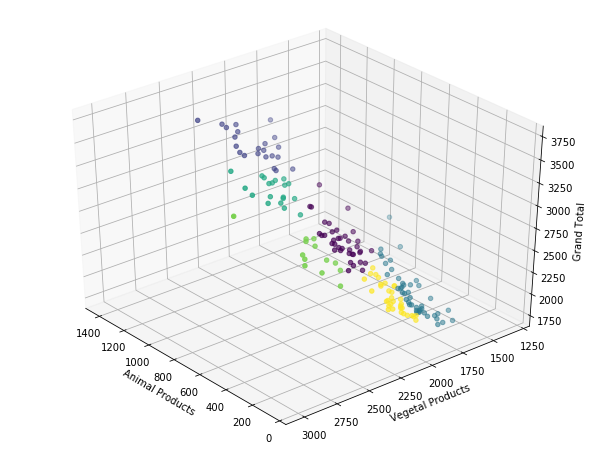

In [105]:
# Let's do some clustering
# This plot uses the coarse nutrition data
clustering_plot3d(nutrition_coarse, n=6)

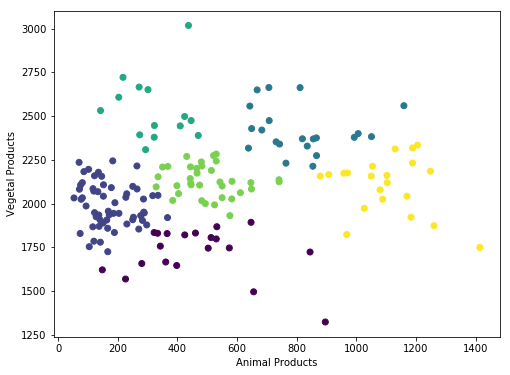

In [109]:
# In this plot we use the Vegetal and Animal Products data
clustering_plot(nutrition_coarse, n=6)

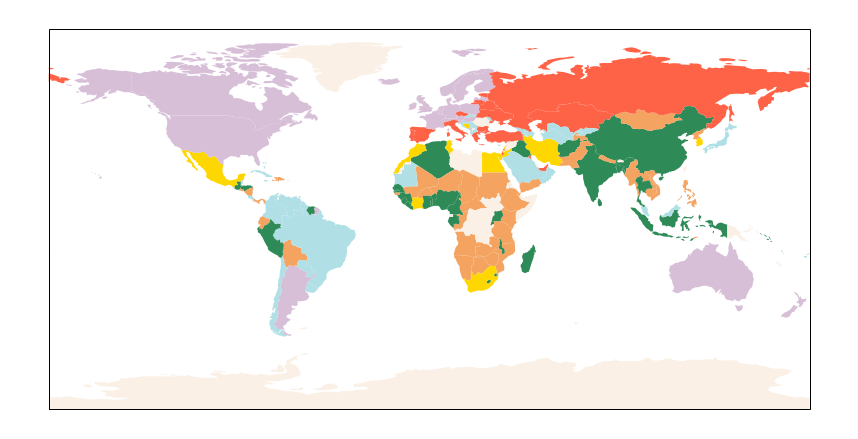

In [21]:
# Clustering using the coarse nutrition data
map_plotly(nutrition_coarse)

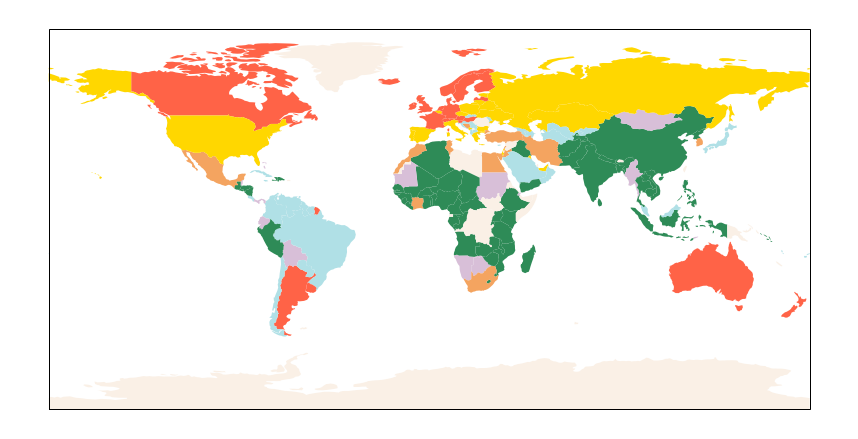

In [115]:
# Clustering using only the Vegetal and Animal Products data
tmp = nutrition_coarse.drop('Grand Total', axis=1)
map_plotly(tmp)

C:\Users\Simon\Anaconda2\envs\geoplotting\lib\site-packages\ipykernel\__main__.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


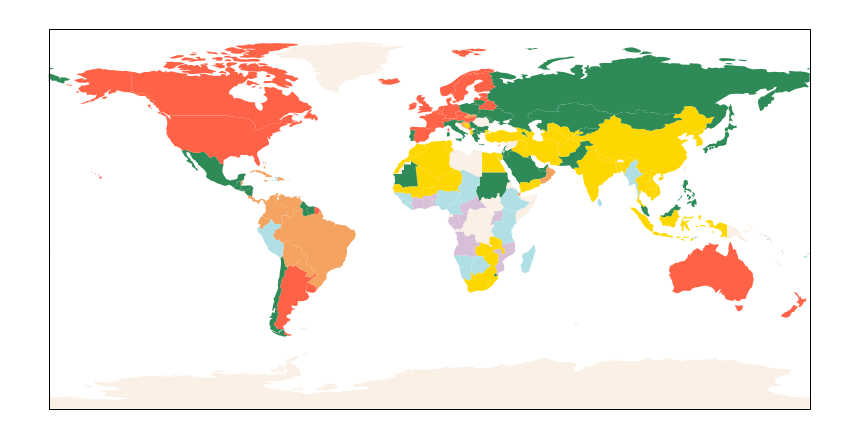

In [25]:
# Clustering using PCA with three components with the detailed nutrition data
map_plotlyPCA(nutrition_fine, n=6, n_pca=3)

C:\Users\Simon\Anaconda2\envs\geoplotting\lib\site-packages\ipykernel\__main__.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


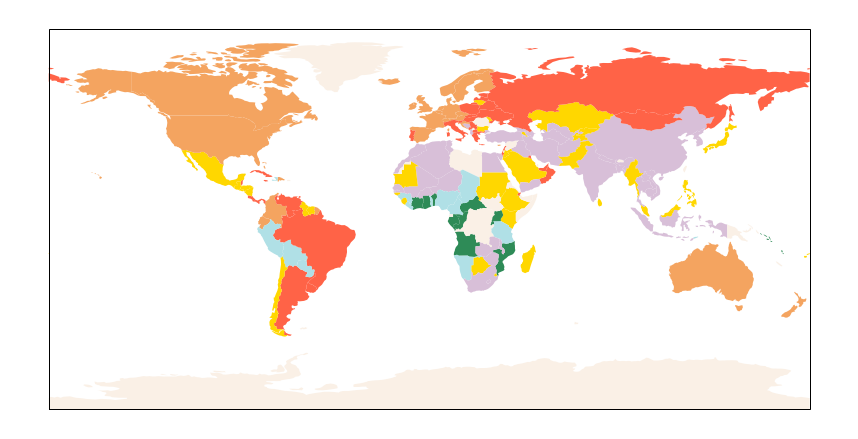

In [26]:
# Clustering using PCA with two components with the detailed nutrition data
map_plotlyPCA(nutrition_fine, n=6, n_pca=2)

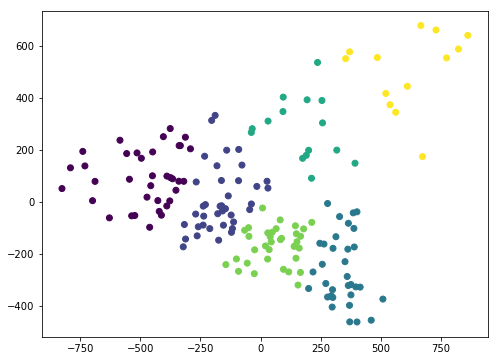

In [27]:
# Clustering using PCA with two components with the detailed nutrition data
clustering_plotPCA(nutrition_fine)

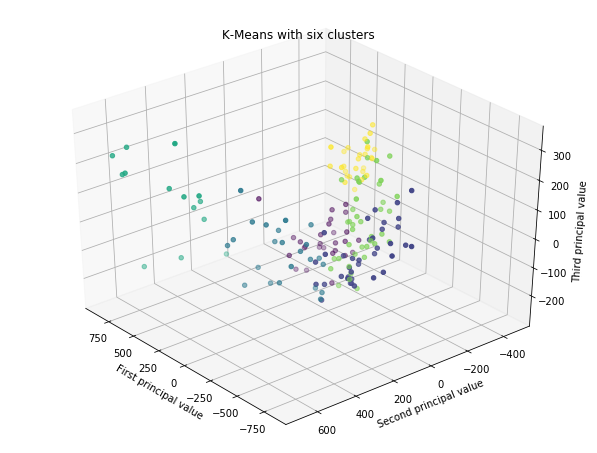

In [28]:
# Clustering using PCA with three components with the detailed nutrition data
clustering_plot3dPCA(nutrition_fine)

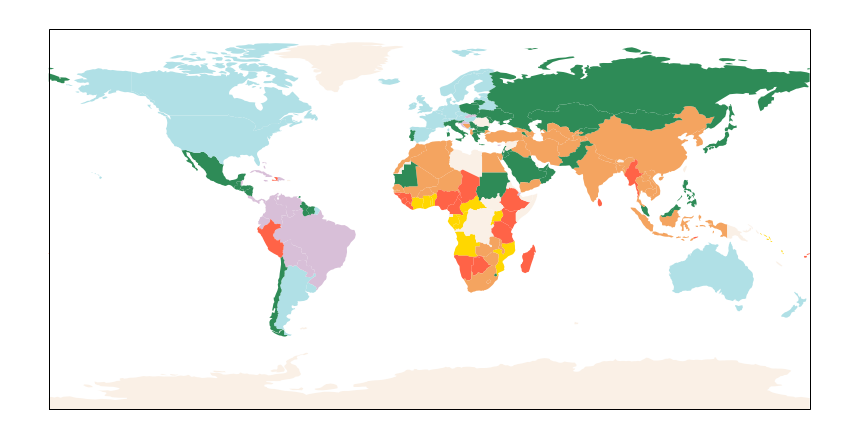

In [118]:
# Clustering using the full detailed nutrition data
map_plotly(nutrition_fine)

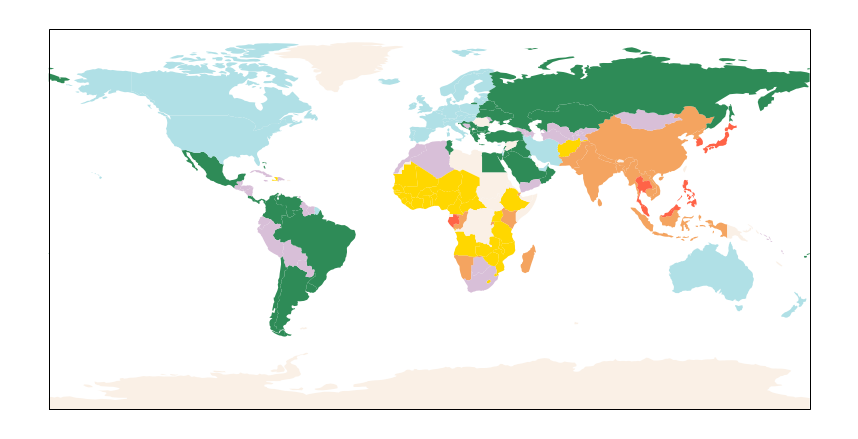

In [72]:
# Clustering using the non-communicable diseases indicators
tmp = dfc.loc[:, ('ISO3 Code', 'Blood pressure', 'BMI', 'Blood glucose', 'Cholesterol', 'Hale')]
map_plotly(tmp)

In [101]:
data_income = pd.read_csv('data_income.csv') # GNI per capita to estimate the income
data_income = data_income.loc[:, ('Country Code', '2015')]
data_income.dropna(inplace=True)
data_income.columns = ['ISO3 Code', 'GNI per capita']
dffi = pd.merge(data_income, dffn, how='right', on='ISO3 Code' )
dffi.dropna(inplace=True)
dfci = pd.merge(data_income, dfcn, how='right', on='ISO3 Code')
dfci.dropna(inplace=True)
dfci.head()

,ISO3 Code,GNI per capita,Region code,Region,Country,Animal Products,Grand Total,Vegetal Products,Blood pressure,BMI,Blood glucose,Cholesterol,Hale
0,AFG,610.0,EMR,Eastern Mediterranean,Afghanistan,0.112790,2348.000000,0.887202,27.852439,10.85000,9.33,21.9,52.3
1,AGO,4180.0,AFR,Africa,Angola,0.088077,1891.132075,0.911933,29.619512,16.50875,6.29,30.9,45.9
2,ALB,4280.0,EUR,Europe,Albania,0.207553,2650.283019,0.792418,31.269512,41.42750,7.69,45.3,68.8
3,ARE,43090.0,EMR,Eastern Mediterranean,United Arab Emirates,0.264062,3163.849057,0.735962,30.645122,63.65625,10.37,57.6,68.3
4,ARG,12450.0,AMR,Americas,Argentina,0.306085,3131.509434,0.693933,31.413415,52.63250,9.70,50.5,67.6


In [125]:
get_pearsonr(dfci, 'GNI per capita')

def get_pearsonr2(data, col):
    ''' Calculates all possible correlation coefficients for a given 
    column name. '''
    print('Correlation with {}'.format(col))
    for arr in col_list:
        if arr != col:
            pcorr = pearsonr(data[arr], data[col])
            print(arr + ':', 'PearsonR: {:.2f}'.format(pcorr[0]), 'P-Value: {:.2e}'.format(pcorr[1]))
    print '-'*55
    print '\n'
    
def get_pearsonr3(data, col):
    ''' Calculates all possible correlation coefficients for a given 
    column name. '''
    print('Correlation with {}'.format(col))
    for arr in ['Grand Total', 'Animal Products', 'Vegetal Products']:
        if arr != col:
            pcorr = pearsonr(data[arr], data[col])
            print(arr + ':', 'PearsonR: {:.2f}'.format(pcorr[0]), 'P-Value: {:.2e}'.format(pcorr[1]))
    print '-'*55
    print '\n'
get_pearsonr2(dffi, 'GNI per capita')
get_pearsonr3(dffc, 'GNI per capita')

Correlation with GNI per capita
('Blood pressure:', 'PearsonR: 0.05', 'P-Value: 5.04e-01')
('Blood glucose:', 'PearsonR: -0.09', 'P-Value: 2.75e-01')
('Cholesterol:', 'PearsonR: 0.75', 'P-Value: 1.88e-29')
('BMI:', 'PearsonR: 0.48', 'P-Value: 1.22e-10')
('Hale:', 'PearsonR: 0.63', 'P-Value: 2.05e-18')
-------------------------------------------------------


Correlation with GNI per capita
('Animal fats:', 'PearsonR: 0.63', 'P-Value: 1.99e-18')
('Cereals - Excluding Beer:', 'PearsonR: -0.52', 'P-Value: 1.82e-12')
('Eggs:', 'PearsonR: 0.62', 'P-Value: 9.76e-18')
('Fish, Seafood:', 'PearsonR: 0.19', 'P-Value: 1.78e-02')
('Fruits - Excluding Wine:', 'PearsonR: -0.04', 'P-Value: 6.11e-01')
('Meat:', 'PearsonR: 0.56', 'P-Value: 2.09e-14')
('Milk - Excluding Butter:', 'PearsonR: 0.61', 'P-Value: 2.49e-17')
('Offals:', 'PearsonR: 0.35', 'P-Value: 6.12e-06')
('Oilcrops:', 'PearsonR: -0.20', 'P-Value: 1.33e-02')
('Pulses:', 'PearsonR: -0.36', 'P-Value: 4.40e-06')
('Starchy Roots:', 'PearsonR: -

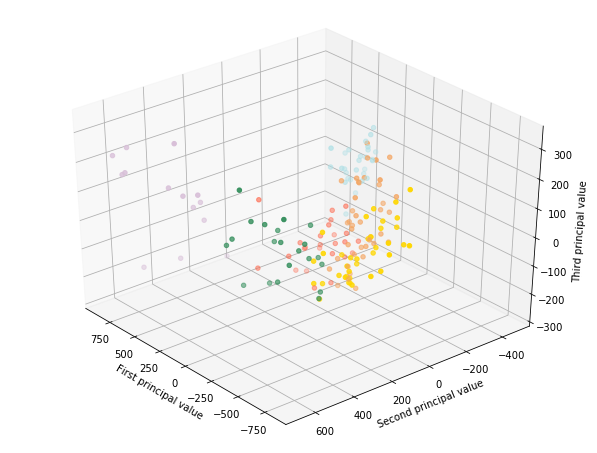

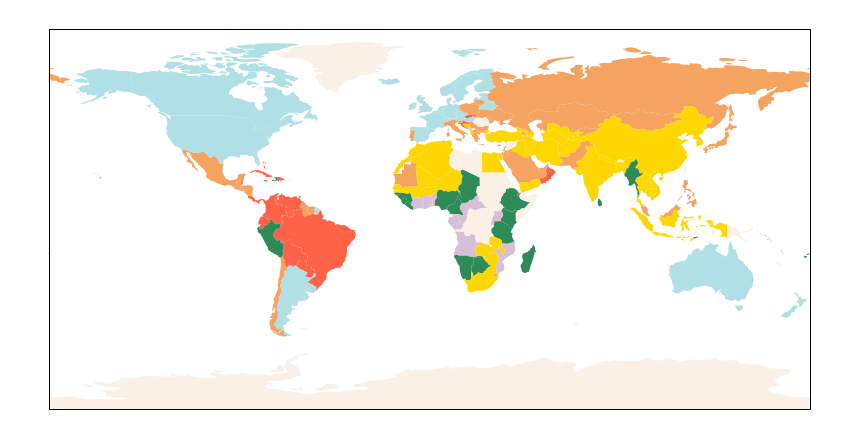

In [149]:
plot_all(dff, n=6, n_pca=3)

['Region code', 'Region', 'ISO3 Code', 'Country', 'Animal fats', 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Starchy Roots', 'Sugar & Sweeteners', 'Treenuts', 'Vegetable Oils', 'Vegetables', 'Blood pressure', 'BMI', 'Blood glucose', 'Cholesterol', 'Hale']


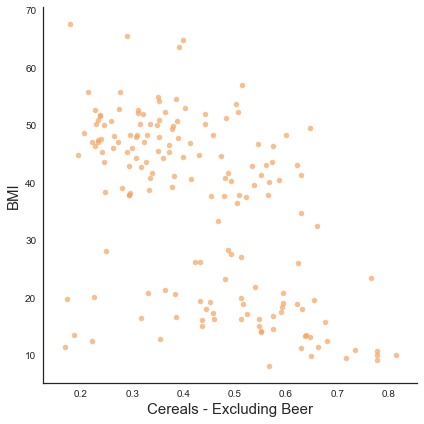

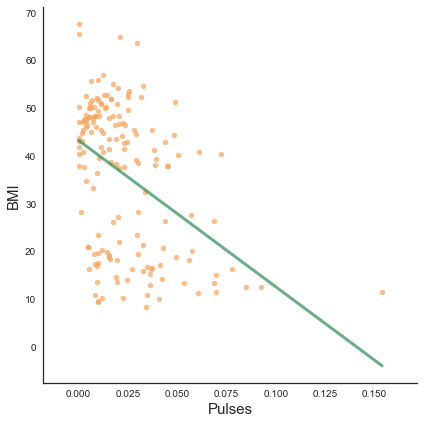

In [376]:
import seaborn as sns

def plot_linear(df, xdata, ydata, n=1):
    tmp = True
    if n != 1:
        tmp = False
    plt.figure()
    sns.set(style='white')
    ax = sns.lmplot(x=xdata, y=ydata, data=df.loc[:, (xdata, ydata)] ,
                    scatter_kws={'color': 'sandybrown', 'alpha': 0.7, 's': 30},
                    line_kws={'color': 'seagreen', 'alpha': 0.7, 'lw': 3},
                    robust=tmp, truncate=True, ci=None, size=6, order=n)
    ax.set_xlabels(size=15)
    ax.set_ylabels(size=15)
    #ax.set(xticklabels=[], yticklabels=[])
    sns.despine()

def plot_scatter(df, xdata, ydata):
    plt.figure()
    sns.set(style='white')
    ax = sns.lmplot(x=xdata, y=ydata, data=df.loc[:, (xdata, ydata)] ,
                    scatter_kws={'color': 'sandybrown', 'alpha': 0.7, 's': 30},
                    line_kws={'color': 'seagreen', 'alpha': 0.7, 'lw': 3},
                    robust=True, truncate=True, ci=None, size=6, fit_reg=False)
    ax.set_xlabels(size=15)
    ax.set_ylabels(size=15)
    #ax.set(xticklabels=[], yticklabels=[])
    sns.despine()

print list(dffn.head())
plot_scatter(dffn, 'Cereals - Excluding Beer', 'BMI')
plot_linear(dffn, 'Pulses', 'BMI')